In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Raw_Data_Oanda (1).csv")

In [3]:
df

,datetime,symbol,open,high,low,close,volume,Target
0,2023-03-16 07:30:00,OANDA:XAUUSD,1911.155,1911.855,1909.470,1910.355,1222.0,0
1,2023-03-16 08:00:00,OANDA:XAUUSD,1910.355,1911.670,1909.900,1911.515,1176.0,0
2,2023-03-16 08:30:00,OANDA:XAUUSD,1911.515,1913.230,1910.730,1913.125,1011.0,0
3,2023-03-16 09:00:00,OANDA:XAUUSD,1913.125,1914.990,1912.035,1913.300,978.0,0
4,2023-03-16 09:30:00,OANDA:XAUUSD,1913.300,1914.985,1913.125,1913.720,1035.0,0
...,...,...,...,...,...,...,...,...
9994,2024-01-19 09:30:00,OANDA:XAUUSD,2022.930,2022.995,2020.870,2020.970,980.0,0
9995,2024-01-19 10:00:00,OANDA:XAUUSD,2020.970,2021.545,2020.790,2021.170,1004.0,0
9996,2024-01-19 10:30:00,OANDA:XAUUSD,2021.170,2021.525,2020.550,2020.615,1238.0,0
9997,2024-01-19 11:00:00,OANDA:XAUUSD,2020.615,2021.935,2020.475,2021.700,2044.0,0


In [4]:
data = df.copy()

In [5]:
def calculate_obv(data):
    obv = [0]

    for i in range(1, len(data)):
        if data['close'][i] > data['close'][i-1]:  
            obv.append(obv[-1] + data['volume'][i])
        elif data['close'][i] < data['close'][i-1]:  
            obv.append(obv[-1] - data['volume'][i])
        else:  
            obv.append(obv[-1])

    return obv

data['OBV'] = calculate_obv(data)
data.head()

,datetime,symbol,open,high,low,close,volume,Target,OBV
0,2023-03-16 07:30:00,OANDA:XAUUSD,1911.155,1911.855,1909.470,1910.355,1222.0,0,0.0
1,2023-03-16 08:00:00,OANDA:XAUUSD,1910.355,1911.670,1909.900,1911.515,1176.0,0,1176.0
2,2023-03-16 08:30:00,OANDA:XAUUSD,1911.515,1913.230,1910.730,1913.125,1011.0,0,2187.0
3,2023-03-16 09:00:00,OANDA:XAUUSD,1913.125,1914.990,1912.035,1913.300,978.0,0,3165.0
4,2023-03-16 09:30:00,OANDA:XAUUSD,1913.300,1914.985,1913.125,1913.720,1035.0,0,4200.0


In [6]:
def calculate_rsi(data, period=14):
    delta = data['close'].diff()

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    rs = avg_gain / avg_loss

    rsi = 100 - (100 / (1 + rs))

    return rsi

data['RSI'] = calculate_rsi(data)
data.head()


,datetime,symbol,open,high,low,close,volume,Target,OBV,RSI
0,2023-03-16 07:30:00,OANDA:XAUUSD,1911.155,1911.855,1909.470,1910.355,1222.0,0,0.0,NaN
1,2023-03-16 08:00:00,OANDA:XAUUSD,1910.355,1911.670,1909.900,1911.515,1176.0,0,1176.0,100.0
2,2023-03-16 08:30:00,OANDA:XAUUSD,1911.515,1913.230,1910.730,1913.125,1011.0,0,2187.0,100.0
3,2023-03-16 09:00:00,OANDA:XAUUSD,1913.125,1914.990,1912.035,1913.300,978.0,0,3165.0,100.0
4,2023-03-16 09:30:00,OANDA:XAUUSD,1913.300,1914.985,1913.125,1913.720,1035.0,0,4200.0,100.0


In [7]:
def calculate_fibonacci_levels(data, period=14):
    rolling_high = data['high'].rolling(window=period, min_periods=1).max()
    rolling_low = data['low'].rolling(window=period, min_periods=1).min()

    data['Fib_23.6%'] = rolling_low + (rolling_high - rolling_low) * 0.236
    data['Fib_38.2%'] = rolling_low + (rolling_high - rolling_low) * 0.382
    data['Fib_50%'] = rolling_low + (rolling_high - rolling_low) * 0.5
    data['Fib_61.8%'] = rolling_low + (rolling_high - rolling_low) * 0.618

    return data

data = calculate_fibonacci_levels(data)
data.head()

,datetime,symbol,open,high,low,close,volume,Target,OBV,RSI,Fib_23.6%,Fib_38.2%,Fib_50%,Fib_61.8%
0,2023-03-16 07:30:00,OANDA:XAUUSD,1911.155,1911.855,1909.470,1910.355,1222.0,0,0.0,NaN,1910.03286,1910.38107,1910.6625,1910.94393
1,2023-03-16 08:00:00,OANDA:XAUUSD,1910.355,1911.670,1909.900,1911.515,1176.0,0,1176.0,100.0,1910.03286,1910.38107,1910.6625,1910.94393
2,2023-03-16 08:30:00,OANDA:XAUUSD,1911.515,1913.230,1910.730,1913.125,1011.0,0,2187.0,100.0,1910.35736,1910.90632,1911.3500,1911.79368
3,2023-03-16 09:00:00,OANDA:XAUUSD,1913.125,1914.990,1912.035,1913.300,978.0,0,3165.0,100.0,1910.77272,1911.57864,1912.2300,1912.88136
4,2023-03-16 09:30:00,OANDA:XAUUSD,1913.300,1914.985,1913.125,1913.720,1035.0,0,4200.0,100.0,1910.77272,1911.57864,1912.2300,1912.88136


In [8]:
def calculate_stochastic_oscillator(data, k_period=14, d_period=3):
    low_min = data['low'].rolling(window=k_period).min()
    high_max = data['high'].rolling(window=k_period).max()

    data['%K'] = ((data['close'] - low_min) / (high_max - low_min)) * 100

    data['%D'] = data['%K'].rolling(window=d_period).mean()

    return data

data = calculate_stochastic_oscillator(data)
data.head()

,datetime,symbol,open,high,low,close,volume,Target,OBV,RSI,Fib_23.6%,Fib_38.2%,Fib_50%,Fib_61.8%,%K,%D
0,2023-03-16 07:30:00,OANDA:XAUUSD,1911.155,1911.855,1909.470,1910.355,1222.0,0,0.0,NaN,1910.03286,1910.38107,1910.6625,1910.94393,NaN,NaN
1,2023-03-16 08:00:00,OANDA:XAUUSD,1910.355,1911.670,1909.900,1911.515,1176.0,0,1176.0,100.0,1910.03286,1910.38107,1910.6625,1910.94393,NaN,NaN
2,2023-03-16 08:30:00,OANDA:XAUUSD,1911.515,1913.230,1910.730,1913.125,1011.0,0,2187.0,100.0,1910.35736,1910.90632,1911.3500,1911.79368,NaN,NaN
3,2023-03-16 09:00:00,OANDA:XAUUSD,1913.125,1914.990,1912.035,1913.300,978.0,0,3165.0,100.0,1910.77272,1911.57864,1912.2300,1912.88136,NaN,NaN
4,2023-03-16 09:30:00,OANDA:XAUUSD,1913.300,1914.985,1913.125,1913.720,1035.0,0,4200.0,100.0,1910.77272,1911.57864,1912.2300,1912.88136,NaN,NaN


In [9]:
def calculate_parabolic_sar(data):
    data['SAR'] = 0.0
    data['EP'] = 0.0  
    data['AF'] = 0.02  

    # Initial trend
    uptrend = data['close'][1] > data['close'][0]

    # Initial EP
    if uptrend:
        data.at[0, 'EP'] = data['high'][0]
    else:
        data.at[0, 'EP'] = data['low'][0]

    # Initial SAR
    data.at[1, 'SAR'] = data['EP'][0]

    for i in range(2, len(data)):
        if uptrend:
            data.at[i, 'SAR'] = data['SAR'][i - 1] + data['AF'][i - 1] * (data['EP'][i - 1] - data['SAR'][i - 1])
        else:
            data.at[i, 'SAR'] = data['SAR'][i - 1] - data['AF'][i - 1] * (data['SAR'][i - 1] - data['EP'][i - 1])

        if uptrend:
            data.at[i, 'SAR'] = min(data.at[i, 'SAR'], data['low'][i - 1], data['low'][i])
            new_high = data['high'][i] > data['EP'][i - 1]
            data.at[i, 'EP'] = max(data['high'][i], data['EP'][i - 1])
        else:
            data.at[i, 'SAR'] = max(data.at[i, 'SAR'], data['high'][i - 1], data['high'][i])
            new_low = data['low'][i] < data['EP'][i - 1]
            data.at[i, 'EP'] = min(data['low'][i], data['EP'][i - 1])

        if (uptrend and new_high) or (not uptrend and new_low):
            data.at[i, 'AF'] = min(data['AF'][i - 1] + 0.02, 0.2)
        else:
            if (uptrend and data['low'][i] < data['SAR'][i]) or (not uptrend and data['high'][i] > data['SAR'][i]):
                uptrend = not uptrend
                data.at[i, 'SAR'] = data['EP'][i - 1]
                data.at[i, 'AF'] = 0.02
                data.at[i, 'EP'] = data['high'][i] if uptrend else data['low'][i]
            else:
                data.at[i, 'AF'] = data['AF'][i - 1]
                data.at[i, 'EP'] = data['EP'][i - 1]

    return data

data = calculate_parabolic_sar(data)
data.head()

,datetime,symbol,open,high,low,close,volume,Target,OBV,RSI,Fib_23.6%,Fib_38.2%,Fib_50%,Fib_61.8%,%K,%D,SAR,EP,AF
0,2023-03-16 07:30:00,OANDA:XAUUSD,1911.155,1911.855,1909.470,1910.355,1222.0,0,0.0,NaN,1910.03286,1910.38107,1910.6625,1910.94393,NaN,NaN,0.000000,1911.855,0.02
1,2023-03-16 08:00:00,OANDA:XAUUSD,1910.355,1911.670,1909.900,1911.515,1176.0,0,1176.0,100.0,1910.03286,1910.38107,1910.6625,1910.94393,NaN,NaN,1911.855000,0.000,0.02
2,2023-03-16 08:30:00,OANDA:XAUUSD,1911.515,1913.230,1910.730,1913.125,1011.0,0,2187.0,100.0,1910.35736,1910.90632,1911.3500,1911.79368,NaN,NaN,1873.617900,1913.230,0.04
3,2023-03-16 09:00:00,OANDA:XAUUSD,1913.125,1914.990,1912.035,1913.300,978.0,0,3165.0,100.0,1910.77272,1911.57864,1912.2300,1912.88136,NaN,NaN,1875.202384,1914.990,0.06
4,2023-03-16 09:30:00,OANDA:XAUUSD,1913.300,1914.985,1913.125,1913.720,1035.0,0,4200.0,100.0,1910.77272,1911.57864,1912.2300,1912.88136,NaN,NaN,1877.589641,1914.990,0.06


In [10]:
def calculate_adx(data, period=14):
    plus_dm = data['high'].diff()
    minus_dm = data['low'].diff()
    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm > 0] = 0
    minus_dm = minus_dm.abs()

    tr1 = data['high'] - data['low']
    tr2 = (data['high'] - data['close'].shift()).abs()
    tr3 = (data['low'] - data['close'].shift()).abs()
    tr = pd.DataFrame({'tr1': tr1, 'tr2': tr2, 'tr3': tr3}).max(axis=1)

    smooth_plus_dm = plus_dm.rolling(window=period).sum()
    smooth_minus_dm = minus_dm.rolling(window=period).sum()
    smooth_tr = tr.rolling(window=period).sum()

    data['+DI'] = (smooth_plus_dm / smooth_tr) * 100
    data['-DI'] = (smooth_minus_dm / smooth_tr) * 100

    dx = (abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI'])) * 100
    data['ADX'] = dx.rolling(window=period).mean()

    return data

data = calculate_adx(data)
data.head()

,datetime,symbol,open,high,low,close,volume,Target,OBV,RSI,...,Fib_50%,Fib_61.8%,%K,%D,SAR,EP,AF,+DI,-DI,ADX
0,2023-03-16 07:30:00,OANDA:XAUUSD,1911.155,1911.855,1909.470,1910.355,1222.0,0,0.0,NaN,...,1910.6625,1910.94393,NaN,NaN,0.000000,1911.855,0.02,NaN,NaN,NaN
1,2023-03-16 08:00:00,OANDA:XAUUSD,1910.355,1911.670,1909.900,1911.515,1176.0,0,1176.0,100.0,...,1910.6625,1910.94393,NaN,NaN,1911.855000,0.000,0.02,NaN,NaN,NaN
2,2023-03-16 08:30:00,OANDA:XAUUSD,1911.515,1913.230,1910.730,1913.125,1011.0,0,2187.0,100.0,...,1911.3500,1911.79368,NaN,NaN,1873.617900,1913.230,0.04,NaN,NaN,NaN
3,2023-03-16 09:00:00,OANDA:XAUUSD,1913.125,1914.990,1912.035,1913.300,978.0,0,3165.0,100.0,...,1912.2300,1912.88136,NaN,NaN,1875.202384,1914.990,0.06,NaN,NaN,NaN
4,2023-03-16 09:30:00,OANDA:XAUUSD,1913.300,1914.985,1913.125,1913.720,1035.0,0,4200.0,100.0,...,1912.2300,1912.88136,NaN,NaN,1877.589641,1914.990,0.06,NaN,NaN,NaN


In [11]:
def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    short_ema = data['close'].ewm(span=short_period, adjust=False).mean()
    long_ema = data['close'].ewm(span=long_period, adjust=False).mean()

    data['MACD'] = short_ema - long_ema

    data['Signal Line'] = data['MACD'].ewm(span=signal_period, adjust=False).mean()

    data['MACD Histogram'] = data['MACD'] - data['Signal Line']

    return data

data = calculate_macd(data)
data.head()

,datetime,symbol,open,high,low,close,volume,Target,OBV,RSI,...,%D,SAR,EP,AF,+DI,-DI,ADX,MACD,Signal Line,MACD Histogram
0,2023-03-16 07:30:00,OANDA:XAUUSD,1911.155,1911.855,1909.470,1910.355,1222.0,0,0.0,NaN,...,NaN,0.000000,1911.855,0.02,NaN,NaN,NaN,0.000000,0.000000,0.000000
1,2023-03-16 08:00:00,OANDA:XAUUSD,1910.355,1911.670,1909.900,1911.515,1176.0,0,1176.0,100.0,...,NaN,1911.855000,0.000,0.02,NaN,NaN,NaN,0.092536,0.018507,0.074028
2,2023-03-16 08:30:00,OANDA:XAUUSD,1911.515,1913.230,1910.730,1913.125,1011.0,0,2187.0,100.0,...,NaN,1873.617900,1913.230,0.04,NaN,NaN,NaN,0.292414,0.073288,0.219125
3,2023-03-16 09:00:00,OANDA:XAUUSD,1913.125,1914.990,1912.035,1913.300,978.0,0,3165.0,100.0,...,NaN,1875.202384,1914.990,0.06,NaN,NaN,NaN,0.459641,0.150559,0.309082
4,2023-03-16 09:30:00,OANDA:XAUUSD,1913.300,1914.985,1913.125,1913.720,1035.0,0,4200.0,100.0,...,NaN,1877.589641,1914.990,0.06,NaN,NaN,NaN,0.618926,0.244232,0.374693


In [12]:
def calculate_bollinger_bands(data, period=20):
    data['Middle Band'] = data['close'].rolling(window=period).mean()

    std_dev = data['close'].rolling(window=period).std()

    data['Upper Band'] = data['Middle Band'] + (std_dev * 2)
    data['Lower Band'] = data['Middle Band'] - (std_dev * 2)

    return data

data = calculate_bollinger_bands(data)
data.head()

,datetime,symbol,open,high,low,close,volume,Target,OBV,RSI,...,AF,+DI,-DI,ADX,MACD,Signal Line,MACD Histogram,Middle Band,Upper Band,Lower Band
0,2023-03-16 07:30:00,OANDA:XAUUSD,1911.155,1911.855,1909.470,1910.355,1222.0,0,0.0,NaN,...,0.02,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
1,2023-03-16 08:00:00,OANDA:XAUUSD,1910.355,1911.670,1909.900,1911.515,1176.0,0,1176.0,100.0,...,0.02,NaN,NaN,NaN,0.092536,0.018507,0.074028,NaN,NaN,NaN
2,2023-03-16 08:30:00,OANDA:XAUUSD,1911.515,1913.230,1910.730,1913.125,1011.0,0,2187.0,100.0,...,0.04,NaN,NaN,NaN,0.292414,0.073288,0.219125,NaN,NaN,NaN
3,2023-03-16 09:00:00,OANDA:XAUUSD,1913.125,1914.990,1912.035,1913.300,978.0,0,3165.0,100.0,...,0.06,NaN,NaN,NaN,0.459641,0.150559,0.309082,NaN,NaN,NaN
4,2023-03-16 09:30:00,OANDA:XAUUSD,1913.300,1914.985,1913.125,1913.720,1035.0,0,4200.0,100.0,...,0.06,NaN,NaN,NaN,0.618926,0.244232,0.374693,NaN,NaN,NaN


In [13]:
data.columns

Index(['datetime', 'symbol', 'open', 'high', 'low', 'close', 'volume',
       'Target', 'OBV', 'RSI', 'Fib_23.6%', 'Fib_38.2%', 'Fib_50%',
       'Fib_61.8%', '%K', '%D', 'SAR', 'EP', 'AF', '+DI', '-DI', 'ADX', 'MACD',
       'Signal Line', 'MACD Histogram', 'Middle Band', 'Upper Band',
       'Lower Band'],
      dtype='object')

In [14]:
data["sin_high"]=np.sin(data["high"]).cumsum()
data["sin_low"]=np.sin(data["low"]).cumsum()

data["tan_high"]=np.tan(data["high"]).cumsum()
data["tan_low"]=np.tan(data["low"]).cumsum()

data["cos_high"]=np.cos(data["high"]).cumsum()
data["cos_low"]=np.cos(data["low"]).cumsum()

data["arctan_high"]=np.arctan(data["high"]).cumsum()
data["arctan_low"]=np.arctan(data["low"]).cumsum()

data["log_high"]=np.log(data["high"]).cumsum()
data["log_low"]=np.log(data["low"]).cumsum()

data["sqrt_high"]=np.sqrt(data["high"]).cumsum()
data["sqrt_low"]=np.sqrt(data["low"]).cumsum()
 
data["log_volume"]=np.log(data["volume"]).cumsum()

In [15]:
def cumstd(high):
    cumsum = np.cumsum(high)
    squares = np.cumsum(np.square(high))
    n = np.arange(1, len(high) + 1)
    cum_mean = cumsum / n
    cum_variance = (squares - 2 * cum_mean * cumsum + n * np.square(cum_mean)) / n
    return np.sqrt(cum_variance)

cumulative_std = cumstd(df["high"])
cumulative_std

0        0.000000
1        0.092500
2        0.695897
3        1.330100
4        1.444616
          ...    
9994    51.987675
9995    51.987960
9996    51.988243
9997    51.988568
9998    51.989077
Name: high, Length: 9999, dtype: float64

In [16]:
data=data.drop(columns=["symbol"])

In [17]:
for i in data.columns:
    try:
        mean = data[i].mean()
        data[i]=data[i].fillna(mean)
    except:
        pass

In [18]:
data

,datetime,open,high,low,close,volume,Target,OBV,RSI,Fib_23.6%,...,tan_low,cos_high,cos_low,arctan_high,arctan_low,log_high,log_low,sqrt_high,sqrt_low,log_volume
0,2023-03-16 07:30:00,1911.155,1911.855,1909.470,1910.355,1222.0,0,0.0,50.449201,1910.03286,...,-0.711396,-0.194620,0.814846,1.570273,1.570273,7.555829,7.554581,43.724764,43.697483,7.108244
1,2023-03-16 08:00:00,1910.355,1911.670,1909.900,1911.515,1176.0,0,1176.0,100.000000,1910.03286,...,-0.901988,-0.205490,1.797163,3.140546,3.140545,15.111562,15.109387,87.447413,87.399885,14.178118
2,2023-03-16 08:30:00,1911.515,1913.230,1910.730,1913.125,1011.0,0,2187.0,100.000000,1910.35736,...,-0.154851,-1.205490,2.598263,4.710820,4.710818,22.668110,22.664628,131.187897,131.111783,21.096813
3,2023-03-16 09:00:00,1913.125,1914.990,1912.035,1913.300,978.0,0,3165.0,100.000000,1910.77272,...,-2.688857,-1.017341,2.231180,6.281094,6.281092,30.225578,30.220551,174.948496,174.838606,27.982323
4,2023-03-16 09:30:00,1913.300,1914.985,1913.125,1913.720,1035.0,0,4200.0,100.000000,1910.77272,...,-2.794169,-0.834104,1.236680,7.851368,7.851365,37.783043,37.777045,218.709038,218.577890,34.924480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2024-01-19 09:30:00,2022.930,2022.995,2020.870,2020.970,980.0,0,-177146.0,48.576593,2021.99336,...,-3118.640050,-78.756146,-183.511865,15695.023794,15695.016335,75800.092062,75785.404993,443223.151795,442897.202346,74763.704728
9995,2024-01-19 10:00:00,2020.970,2021.545,2020.790,2021.170,1004.0,0,-176142.0,44.160942,2021.93224,...,-3117.716039,-78.825962,-184.246327,15696.594096,15696.586637,75807.703679,75793.016237,443268.113389,442942.155544,74770.616476
9996,2024-01-19 10:30:00,2021.170,2021.525,2020.550,2020.615,1238.0,0,-177380.0,39.280506,2021.74888,...,-3117.162020,-78.915713,-185.121054,15698.164398,15698.156938,75815.315287,75800.627362,443313.074762,442987.106072,74777.737728
9997,2024-01-19 11:00:00,2020.615,2021.935,2020.475,2021.700,2044.0,0,-175336.0,44.091316,2021.69158,...,-3116.702280,-78.601026,-186.029634,15699.734699,15699.727240,75822.927097,75808.238450,443358.040693,443032.055766,74785.360392


In [19]:
data.isna().sum()

datetime          0
open              0
high              0
low               0
close             0
volume            0
Target            0
OBV               0
RSI               0
Fib_23.6%         0
Fib_38.2%         0
Fib_50%           0
Fib_61.8%         0
%K                0
%D                0
SAR               0
EP                0
AF                0
+DI               0
-DI               0
ADX               0
MACD              0
Signal Line       0
MACD Histogram    0
Middle Band       0
Upper Band        0
Lower Band        0
sin_high          0
sin_low           0
tan_high          0
tan_low           0
cos_high          0
cos_low           0
arctan_high       0
arctan_low        0
log_high          0
log_low           0
sqrt_high         0
sqrt_low          0
log_volume        0
dtype: int64

In [20]:
data.columns

Index(['datetime', 'open', 'high', 'low', 'close', 'volume', 'Target', 'OBV',
       'RSI', 'Fib_23.6%', 'Fib_38.2%', 'Fib_50%', 'Fib_61.8%', '%K', '%D',
       'SAR', 'EP', 'AF', '+DI', '-DI', 'ADX', 'MACD', 'Signal Line',
       'MACD Histogram', 'Middle Band', 'Upper Band', 'Lower Band', 'sin_high',
       'sin_low', 'tan_high', 'tan_low', 'cos_high', 'cos_low', 'arctan_high',
       'arctan_low', 'log_high', 'log_low', 'sqrt_high', 'sqrt_low',
       'log_volume'],
      dtype='object')

Text(0, 0.5, 'low')

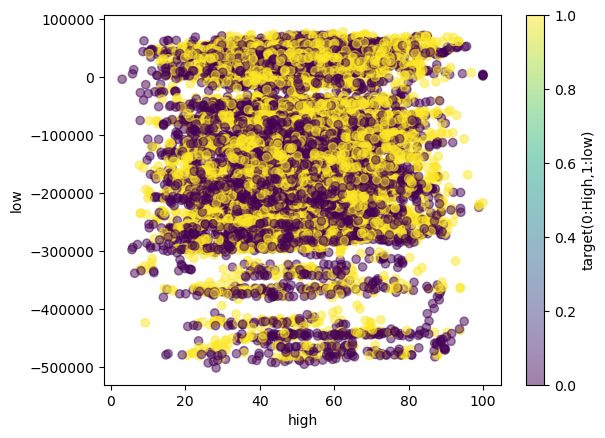

In [21]:
import matplotlib.pyplot as plt
plt.scatter(data["RSI"],data["OBV"],c=data['Target'],cmap="viridis",alpha=0.5)
plt.colorbar(label='target(0:High,1:low)')
plt.xlabel("high")
plt.ylabel("low")

Text(0, 0.5, 'low')

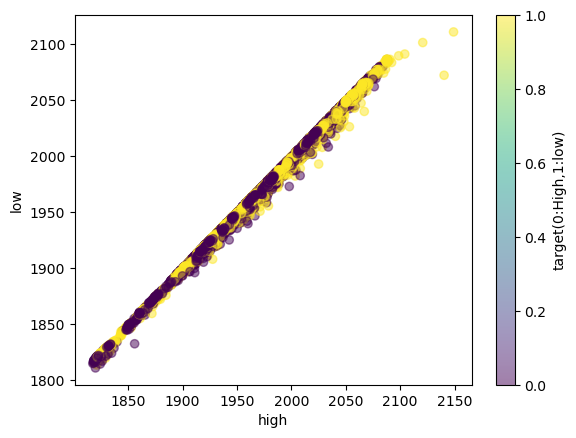

In [22]:
plt.scatter(data["high"],data["low"],c=data["Target"],cmap="viridis",alpha=0.5)
plt.colorbar(label='target(0:High,1:low)')
plt.xlabel("high")
plt.ylabel("low")

In [23]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import chi2

In [24]:
def select_features(data,target_col,method="chi2",k=10):
    X = data.drop(columns=["Target","datetime"])
    y = data["Target"]
    
    if method=="chi2":
        # create a select k best method for chi2
        selector = SelectKBest(chi2,k=k)
        # create a select k best method for anova
    elif method == "f_classif":
        selector = SelectKBest(f_classif,k=k)
        
    else:
        raise ValueError(f"Unsupported method '{method}', Please choose 'chi2' or 'f_classif'.")
        
    # fit the selector to the data
    
    selector.fit(X,y)
    
    seleted_indices = selector.get_support(indices=True)
    
    # get the feature names
    
    select_features = list(X.columns[seleted_indices])
    
    return select_features

In [25]:
anova_features = select_features(data,'Class',method = "f_classif",k=10)

print(anova_features)

['volume', 'RSI', '%D', 'SAR', 'AF', '+DI', '-DI', 'MACD', 'Signal Line', 'sin_low']


In [26]:
# X = data.drop(columns=["Target","datetime"])
# y = data["Target"]

In [27]:
# from sklearn.preprocessing import MinMaxScaler,StandardScaler
# scaler = MinMaxScaler()
# X_sca = scaler.fit_transform(X)
# X_scaled

In [28]:
data.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume', 'Target', 'OBV',
       'RSI', 'Fib_1', 'Fib_2', 'Fib_3', 'Fib_4', 'K', 'D',
       'SAR', 'EP', 'AF', 'DI_plus', 'DI_minus', 'ADX', 'MACD', 'Signal_Line',
       'MACD_Histogram', 'Middle_Band', 'Upper_Band', 'Lower_Band', 'sin_high',
       'sin_low', 'tan_high', 'tan_low', 'cos_high', 'cos_low', 'arctan_high',
       'arctan_low', 'log_high', 'log_low', 'sqrt_high', 'sqrt_low',
       'log_volume']

In [29]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC


X = data.drop(columns=["Target","datetime"])
y = data["Target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=343)

pipeline_lr = Pipeline([('scaler',StandardScaler()),
                    ('classifier',LogisticRegression())
                    ])
pipeline_rf = Pipeline([('scaler',StandardScaler()),
                    ('classifier',RandomForestClassifier(n_estimators=100,min_samples_split=10,max_depth=3))
                    ])
pipeline_xg = Pipeline([('scaler',StandardScaler()),
                    ('classifier',xgb.XGBClassifier(n_estimators=1000,learning_rate=0.09,max_depth=4,gamma=1,min_child_weight=1))
                    ])

pipeline_dt = Pipeline([('scaler',StandardScaler()),
                    ('classifier',DecisionTreeClassifier(criterion="gini",max_depth=4,min_samples_split=5))
                    ])

# pipeline_Bg = Pipeline([('scaler',StandardScaler()),
#     ('classifier',BaggingClassifier(n_estimators=100,max_samples=0.8,max_features=10))
#                     ])

pipeline_Bg = BaggingClassifier(n_estimators=1000,max_samples=0.8,max_features=10)
pipeline_svm = Pipeline([('scaler',StandardScaler()),
                    ('classifier',SVC(kernel="rbf",gamma=0.001))
                    ])
pipeline_ab = Pipeline([('scaler',StandardScaler()),
                    ('classifier',AdaBoostClassifier(n_estimators=100,learning_rate=0.09))
                    ])
# pipeline_gb = Pipeline([('scaler',StandardScaler()),
#                     ('classifier',GradientBoostingClassifier(n_estimators=1000,learning_rate=0.09,max_depth=4,min_samples_split=5))
#                     ])
pipeline_lr.fit(X_train,y_train)
print("Logistic Regression is running")
y_pred_test = pipeline_lr.predict(X_test)
print("Logistic Regression Classification Report Below!!!")
print(classification_report(y_test,y_pred_test))
print("Logistic Regression Pipeline is ended")

print("Random Forest Starts Now!!!!!!!!!!!")
pipeline_rf.fit(X_train,y_train)
print("Random Forestis running")
y_pred_test = pipeline_rf.predict(X_test)
print("Random Forest classification Report Below!!!!")
print(classification_report(y_test,y_pred_test))

print("xgboost is running")
pipeline_xg.fit(X_train,y_train)
y_pred_test =pipeline_xg.predict(X_test)
print("xgboost classification Report Below!!!!")
print(classification_report(y_test,y_pred_test))

print("decision tree is running")
pipeline_dt.fit(X_train,y_train)
y_pred_test = pipeline_dt.predict(X_test)
print("decision classification Report Below!!!!")
print(classification_report(y_test,y_pred_test))

print("Bagging is running")
pipeline_Bg.fit(X_train,y_train)
y_pred_test = pipeline_Bg.predict(X_test)
print("Bagging classification Report Below!!!!")
print(classification_report(y_test,y_pred_test))

print("SVM is running")
pipeline_svm.fit(X_train,y_train)
y_pred_test = pipeline_svm.predict(X_test)
print("SVM classification Report Below!!!!")
print(classification_report(y_test,y_pred_test))

print("Adaboosting is running")
pipeline_ab.fit(X_train,y_train)
y_pred_test = pipeline_ab.predict(X_test)
print("Adaboosting classification Report Below!!!!")
print(classification_report(y_test,y_pred_test))

# print("Gradient is running")
# pipeline_gb.fit(X_train,y_train)
# y_pred_test = pipeline_gb.predict(X_test)
# print("Gradientboosting classification Report Below!!!!")
# print(classification_report(y_test,y_pred_test))

C:\Users\Mallikarjun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression is running
Logistic Regression Classification Report Below!!!
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1016
           1       0.55      0.55      0.55       984

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.56      0.56      0.56      2000

Logistic Regression Pipeline is ended
Random Forest Starts Now!!!!!!!!!!!
Random Forestis running
Random Forest classification Report Below!!!!
              precision    recall  f1-score   support

           0       0.62      0.48      0.54      1016
           1       0.56      0.69      0.62       984

    accuracy                           0.58      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.59      0.58      0.58      2000

xgboost is running
xgboost classification Report Below!!!!
              precision    recall  f1-score   support

      

In [31]:
import pickle
file_name = "xgboost_forex_model.pkl"


pickle.dump(pipeline_xg, open(file_name, "wb"))

In [32]:
data.dtypes

datetime          datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume                   float64
Target                     int64
OBV                      float64
RSI                      float64
Fib_1                    float64
Fib_2                    float64
Fib_3                    float64
Fib_4                    float64
K                        float64
D                        float64
SAR                      float64
EP                       float64
AF                       float64
DI_plus                  float64
DI_minus                 float64
ADX                      float64
MACD                     float64
Signal_Line              float64
MACD_Histogram           float64
Middle_Band              float64
Upper_Band               float64
Lower_Band               float64
sin_high                 float64
sin_low                  float64
tan_high                 float64
tan_low   

In [33]:
data.columns 

Index(['datetime', 'open', 'high', 'low', 'close', 'volume', 'Target', 'OBV',
       'RSI', 'Fib_1', 'Fib_2', 'Fib_3', 'Fib_4', 'K', 'D', 'SAR', 'EP', 'AF',
       'DI_plus', 'DI_minus', 'ADX', 'MACD', 'Signal_Line', 'MACD_Histogram',
       'Middle_Band', 'Upper_Band', 'Lower_Band', 'sin_high', 'sin_low',
       'tan_high', 'tan_low', 'cos_high', 'cos_low', 'arctan_high',
       'arctan_low', 'log_high', 'log_low', 'sqrt_high', 'sqrt_low',
       'log_volume'],
      dtype='object')

In [34]:
pickle = pd.read_pickle("xgboost_forex_model.pkl")

In [35]:
pickle

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.09,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1000,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [36]:
y_test.tail(1)

9303    0
Name: Target, dtype: int64

In [37]:
X.dtypes

open              float64
high              float64
low               float64
close             float64
volume            float64
OBV               float64
RSI               float64
Fib_1             float64
Fib_2             float64
Fib_3             float64
Fib_4             float64
K                 float64
D                 float64
SAR               float64
EP                float64
AF                float64
DI_plus           float64
DI_minus          float64
ADX               float64
MACD              float64
Signal_Line       float64
MACD_Histogram    float64
Middle_Band       float64
Upper_Band        float64
Lower_Band        float64
sin_high          float64
sin_low           float64
tan_high          float64
tan_low           float64
cos_high          float64
cos_low           float64
arctan_high       float64
arctan_low        float64
log_high          float64
log_low           float64
sqrt_high         float64
sqrt_low          float64
log_volume        float64
dtype: objec

In [38]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9994    0
9995    0
9996    0
9997    0
9998    0
Name: Target, Length: 9999, dtype: int64

In [39]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 805C-C1CD

 Directory of C:\Users\Mallikarjun\Desktop\python

23-01-2024  13:57    <DIR>          .
23-01-2024  10:45    <DIR>          ..
23-01-2024  12:02    <DIR>          .ipynb_checkpoints
22-01-2024  23:02    <DIR>          __pycache__
05-01-2024  09:00            54,000 ada_boosting.ipynb
12-01-2024  22:52           142,389 all_algo prat.ipynb
15-01-2024  22:47         1,607,924 all_algorithsm.ipynb
04-12-2023  08:18             8,674 anova.ipynb
04-01-2024  08:09            14,750 Bagging and Random Forest__Cross Validation method.ipynb
03-01-2024  20:00           158,568 Bagging and RandomForest.ipynb
23-01-2024  12:35        15,061,672 Bagging_forex_model.pkl
19-12-2023  10:19             7,510 bankruptcy-prevention.csv
12-12-2023  08:53             3,527 Cars.csv
20-12-2023  07:28            29,822 claimants (1).csv
11-01-2024  08:44            11,659 cv method for adaboost,gradientboost and xgboost.ipynb
21-12-2023  08:19 